In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm

# Данные о цене фьючерсов на золото

In [2]:
df = pd.read_csv('GOLDdata.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df

,Date,Price,Open,High,Low
0,2023-10-27,1998.5,1995.0,2019.7,1986.4
1,2023-10-26,1997.4,1991.2,2003.7,1981.6
2,2023-10-25,1994.9,1982.7,1998.6,1973.6
3,2023-10-24,1986.1,1984.1,1992.0,1964.6
4,2023-10-23,1987.8,1987.7,1994.3,1971.0
...,...,...,...,...,...
3055,2012-01-09,1608.1,1617.7,1624.6,1605.7
3056,2012-01-06,1616.8,1622.4,1632.3,1609.0
3057,2012-01-05,1620.1,1614.4,1626.8,1597.7
3058,2012-01-04,1612.7,1604.9,1619.8,1593.8


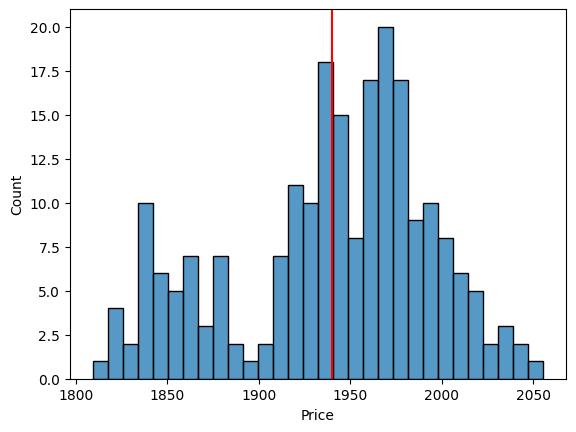

In [50]:
sns.histplot(prices_2023, bins=30)
plt.axvline(prices_2023.mean(), color='r');

# Проверка ЦПТ

In [5]:
data_2023 = df[df['Date'] >= '2023-01-01'].sort_values('Date').reset_index(drop=True)

In [6]:
data_2023

,Date,Price,Open,High,Low
0,2023-01-02,1835.8,1834.55,1837.9,1831.4
1,2023-01-03,1846.1,1831.80,1856.6,1831.3
2,2023-01-04,1859.0,1845.20,1871.3,1842.0
3,2023-01-05,1840.6,1861.20,1864.3,1829.9
4,2023-01-06,1869.7,1835.90,1875.2,1835.2
...,...,...,...,...,...
214,2023-10-23,1987.8,1987.70,1994.3,1971.0
215,2023-10-24,1986.1,1984.10,1992.0,1964.6
216,2023-10-25,1994.9,1982.70,1998.6,1973.6
217,2023-10-26,1997.4,1991.20,2003.7,1981.6


In [7]:
prices_2023 = data_2023['Price'] # список цен на золото в 2023

In [8]:
prices_2023

0      1835.8
1      1846.1
2      1859.0
3      1840.6
4      1869.7
        ...  
214    1987.8
215    1986.1
216    1994.9
217    1997.4
218    1998.5
Name: Price, Length: 219, dtype: float64

In [9]:
print('Real mean price:', prices_2023.mean().round(2))

Real mean price: 1940.08


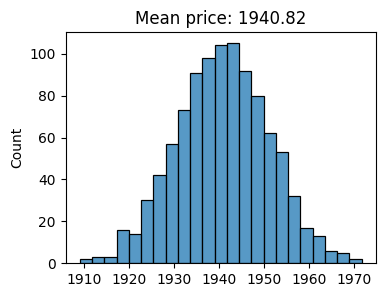

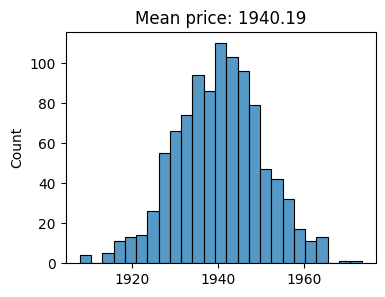

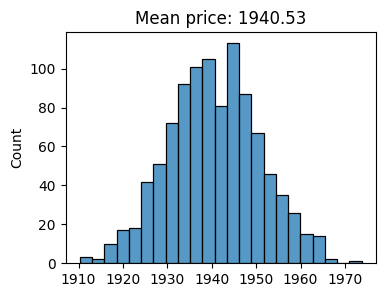

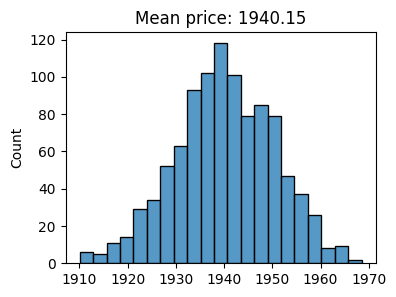

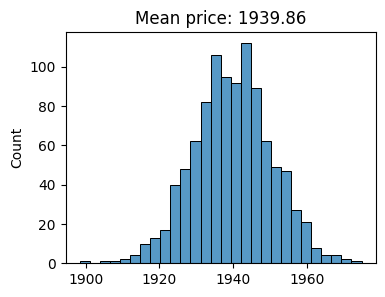

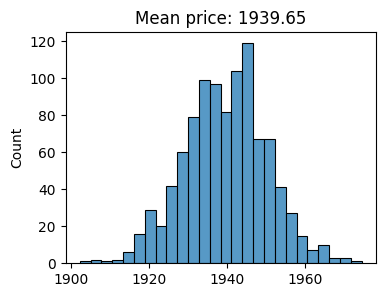

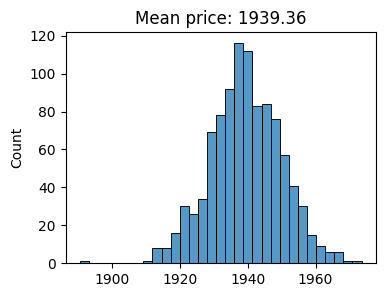

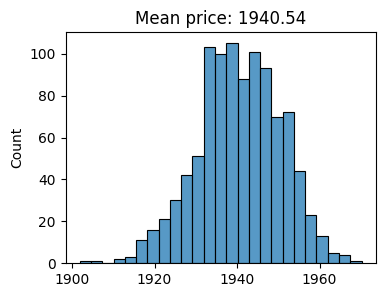

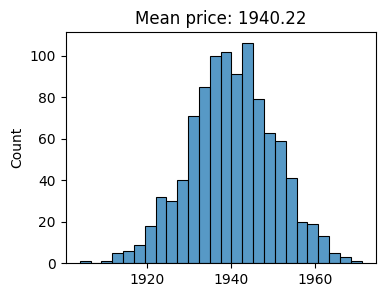

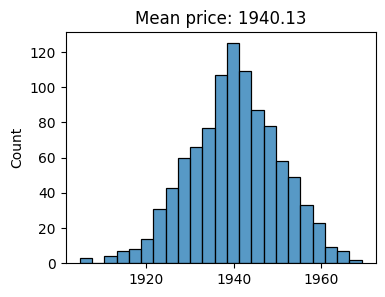

In [10]:
t = 10      # сколько раз провернуть ахалай махалай
k = 1000    # сколько выборок сделать
n = 25      # сколько наблюдений брать для выборки

for i in range(t):
    means = []
    for j in range(k):
        means.append(prices_2023.sample(n).mean())
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.histplot(means).set(title=f'Mean price: {np.array(means).mean().round(2)}')

# Стандартизация выборки

In [11]:
prices_2023

0      1835.8
1      1846.1
2      1859.0
3      1840.6
4      1869.7
        ...  
214    1987.8
215    1986.1
216    1994.9
217    1997.4
218    1998.5
Name: Price, Length: 219, dtype: float64

In [12]:
nn = 25
sample = prices_2023.sample(nn)
std_prices_2023 = (sample - sample.mean()) / sample.std(ddof=1)

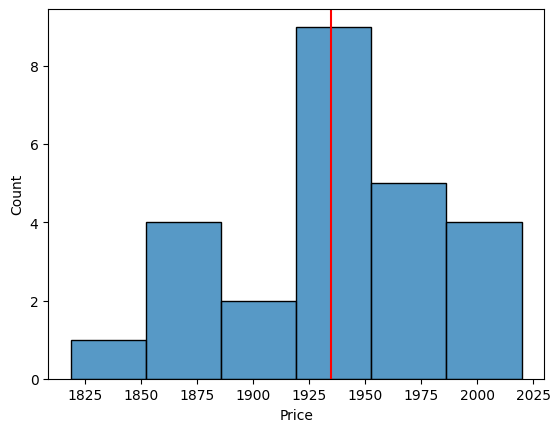

In [13]:
sns.histplot(data=sample)
plt.axvline(sample.mean(), color = 'r');

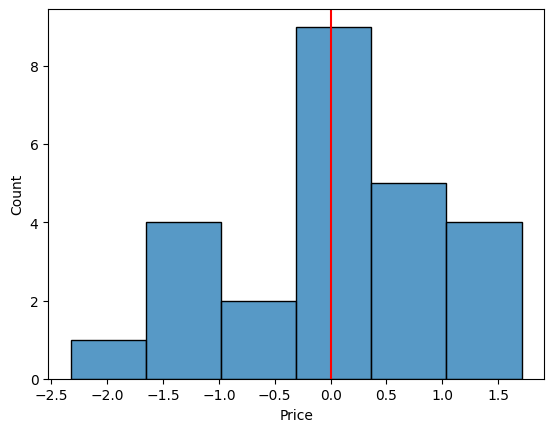

In [14]:
sns.histplot(data=std_prices_2023)
plt.axvline(std_prices_2023.mean(), color = 'r');

### Стандартная ошибка среднего

In [15]:
se = prices_2023.std() / np.sqrt(nn)
se

11.039088649524311

Важно понимать, что для расчета стандартной ошибки (SE) необходимо знать стандартное отклонение генеральной совокупности.

# z - тест

Выдвинем предположение о том, что средняя стоимость фьючерса на золото в 2023 году до имеющейся даты была равна **1950**.

In [16]:
h0 = 1950
print(f'Средняя цена по нашей выборке: ~{sample.mean().round(2)}')
print(f'Стандартная ошибка для размера нашей выборки: ~{se.round(2)}')
print(f'Мы предполагаем, что средняя цена за весь период = {h0}')

Средняя цена по нашей выборке: ~1934.57
Стандартная ошибка для размера нашей выборки: ~11.04
Мы предполагаем, что средняя цена за весь период = 1950


Посчитаем z-статистику

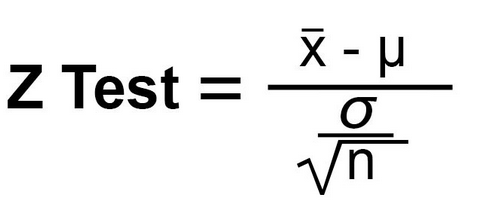

In [17]:
z = (sample.mean() - h0) / se
print(f'z-критерий: ~{z.round(2)}')

z-критерий: ~-1.4


Мы кое-как залезли в 95%-й доверительный интервал (в стандартном нормальном распределении он лежит в пределах [-1.96, 1.96].

А значит мы не можем отклонить нулевую гипотезу о том, что 1950 - средняя цена фьючерсов на золото в 2023 году.

In [21]:
print(f'А вот и реальная цена на эту ценную бумагу: {prices_2023.mean().round(2)}')

А вот и реальная цена на эту ценную бумагу: 1940.08


Бахнем этот тест много раз с разными выборками ради интереса

In [19]:
n_ztests = 100   # сколько раз бахаем
sample_size = 25   # размер выборки
h0 = 1950   # наша нулевая гипотеза
alpha = 0.05   # критический уровень значимости
test_positive = 0
test_false = 0

for i in range(n_ztests):
    print()
    new_sample = prices_2023.sample(sample_size)
    z = (new_sample.mean() - h0) / (prices_2023.std() / np.sqrt(sample_size))
    if -1.96 <= z <= 1.96:
        print(f'--- Тест №{i+1}---\nСреднее выборки: {new_sample.mean().round(2)}.\nИстинное среднее: {prices_2023.mean().round(2)}\nКритерий z: {z.round(2)}.\nНулевая гипотеза не отклонена.')
        test_positive += 1
    else:
        print(f'--- Тест №{i+1}---\nСреднее выборки: {new_sample.mean().round(2)}.\nИстинное среднее: {prices_2023.mean().round(2)}\nКритерий z: {z.round(2)}.\nНулевая гипотеза отклонена.')
        test_false += 1
    print()
print()
print()
print(f'Гипотеза не была отклонена {test_positive} раз, гипотеза была отклонена {test_false} раз.')


--- Тест №1---
Среднее выборки: 1926.64.
Истинное среднее: 1940.08
Критерий z: -2.12.
Нулевая гипотеза отклонена.


--- Тест №2---
Среднее выборки: 1937.89.
Истинное среднее: 1940.08
Критерий z: -1.1.
Нулевая гипотеза не отклонена.


--- Тест №3---
Среднее выборки: 1939.71.
Истинное среднее: 1940.08
Критерий z: -0.93.
Нулевая гипотеза не отклонена.


--- Тест №4---
Среднее выборки: 1944.43.
Истинное среднее: 1940.08
Критерий z: -0.5.
Нулевая гипотеза не отклонена.


--- Тест №5---
Среднее выборки: 1937.59.
Истинное среднее: 1940.08
Критерий z: -1.12.
Нулевая гипотеза не отклонена.


--- Тест №6---
Среднее выборки: 1927.49.
Истинное среднее: 1940.08
Критерий z: -2.04.
Нулевая гипотеза отклонена.


--- Тест №7---
Среднее выборки: 1945.87.
Истинное среднее: 1940.08
Критерий z: -0.37.
Нулевая гипотеза не отклонена.


--- Тест №8---
Среднее выборки: 1944.16.
Истинное среднее: 1940.08
Критерий z: -0.53.
Нулевая гипотеза не отклонена.


--- Тест №9---
Среднее выборки: 1949.53.
Истинное средн

### Проверим ошибку I рода

In [44]:
n_ztests2 = 100   # сколько раз бахаем
sample_size2 = 25   # размер выборки
h02 = prices_2023.mean()   # наша нулевая гипотеза
alpha2 = 0.05   # критический уровень значимости
test_positive2 = 0
test_false2 = 0

for i in range(n_ztests2):
    print()
    new_sample = prices_2023.sample(sample_size2)
    z = (new_sample.mean() - h02) / (prices_2023.std() / np.sqrt(sample_size2))
    if -1.96 <= z <= 1.96:
        print(f'--- Тест №{i+1}---\nСреднее выборки: {new_sample.mean().round(2)}.\nИстинное среднее: {prices_2023.mean().round(2)}\nКритерий z: {z.round(2)}.\nНулевая гипотеза не отклонена.')
        test_positive2 += 1
    else:
        print(f'--- Тест №{i+1}---\nСреднее выборки: {new_sample.mean().round(2)}.\nИстинное среднее: {prices_2023.mean().round(2)}\nКритерий z: {z.round(2)}.\nНулевая гипотеза отклонена.')
        test_false2 += 1
    print()


--- Тест №1---
Среднее выборки: 1941.8.
Истинное среднее: 1940.08
Критерий z: 0.16.
Нулевая гипотеза не отклонена.


--- Тест №2---
Среднее выборки: 1926.66.
Истинное среднее: 1940.08
Критерий z: -1.22.
Нулевая гипотеза не отклонена.


--- Тест №3---
Среднее выборки: 1937.47.
Истинное среднее: 1940.08
Критерий z: -0.24.
Нулевая гипотеза не отклонена.


--- Тест №4---
Среднее выборки: 1928.47.
Истинное среднее: 1940.08
Критерий z: -1.05.
Нулевая гипотеза не отклонена.


--- Тест №5---
Среднее выборки: 1940.69.
Истинное среднее: 1940.08
Критерий z: 0.05.
Нулевая гипотеза не отклонена.


--- Тест №6---
Среднее выборки: 1921.85.
Истинное среднее: 1940.08
Критерий z: -1.65.
Нулевая гипотеза не отклонена.


--- Тест №7---
Среднее выборки: 1938.44.
Истинное среднее: 1940.08
Критерий z: -0.15.
Нулевая гипотеза не отклонена.


--- Тест №8---
Среднее выборки: 1948.7.
Истинное среднее: 1940.08
Критерий z: 0.78.
Нулевая гипотеза не отклонена.


--- Тест №9---
Среднее выборки: 1953.71.
Истинное ср

In [45]:
print(f'Гипотеза не была отклонена {test_positive2} раз, гипотеза была отклонена {test_false2} раз.')
print(f'Уровень значимости α: {alpha2}')
print(f'Частота ошибки первого рода: {test_false2 / n_ztests2}')

Гипотеза не была отклонена 96 раз, гипотеза была отклонена 4 раз.
Уровень значимости α: 0.05
Частота ошибки первого рода: 0.04


Довольно похоже на правду, ошибка встречается по 3-5 раз на каждые 100 тестов.

# p - value

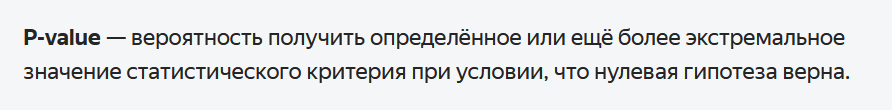

# Ошибки I и II рода, мощность теста

Сформулируем гипотезы:

    H0: μ=120,
    H1: μ≠120.

Обратите внимание, что мы тут снова формулируем H0H0​ как некоторый статус-кво, текущее базовое предположение. Однако теперь, конечно, мы бы хотели получить такие данные, которые позволят её отклонить.
Допустим, что стандартное отклонение генеральной совокупности равно 10, а количество наблюдений 100.
Давайте снова обратимся к идее многократного повторения эксперимента и получаемого с помощью этих экспериментов распределения выборочных средних. Если бы была верна нулевая гипотеза, то в большинстве экспериментов среднее значение было бы близко к 120, но в редких случаях может довольно далеко отклоняться.

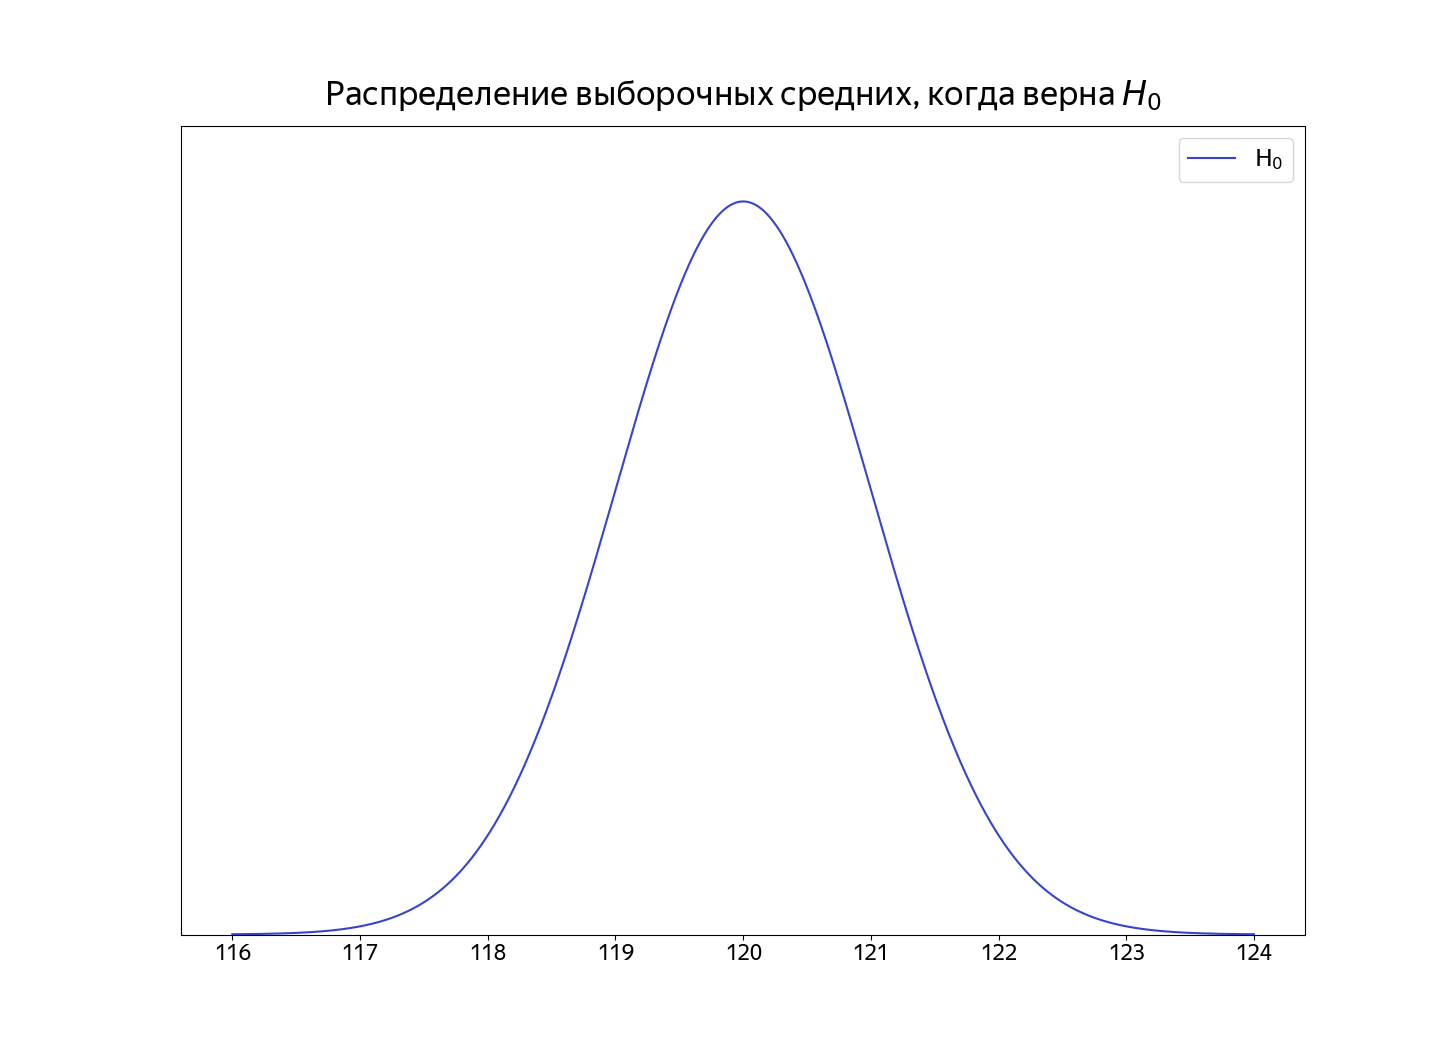

Среднее значение распределения выборочных средних будет очень близким к μμ генеральной совокупности, а стандартное отклонение SE = 1.
И мы можем, например, использовать метод обратной стандартизации, который рассматривали в прошлом уроке, чтобы получить критические значения для средних значений.
Если мы выбираем стандартный уровень значимости α=0.05, то критические значения для z-статистики будут −1.96 и 1.96. Найдём критические значения для средних:

    Левая граница: μ−1.96⋅SE=120−1.96⋅1=118.04,
    Правая граница: μ+1.96⋅SE=120+1.96⋅1=121.96.

Изобразим их:

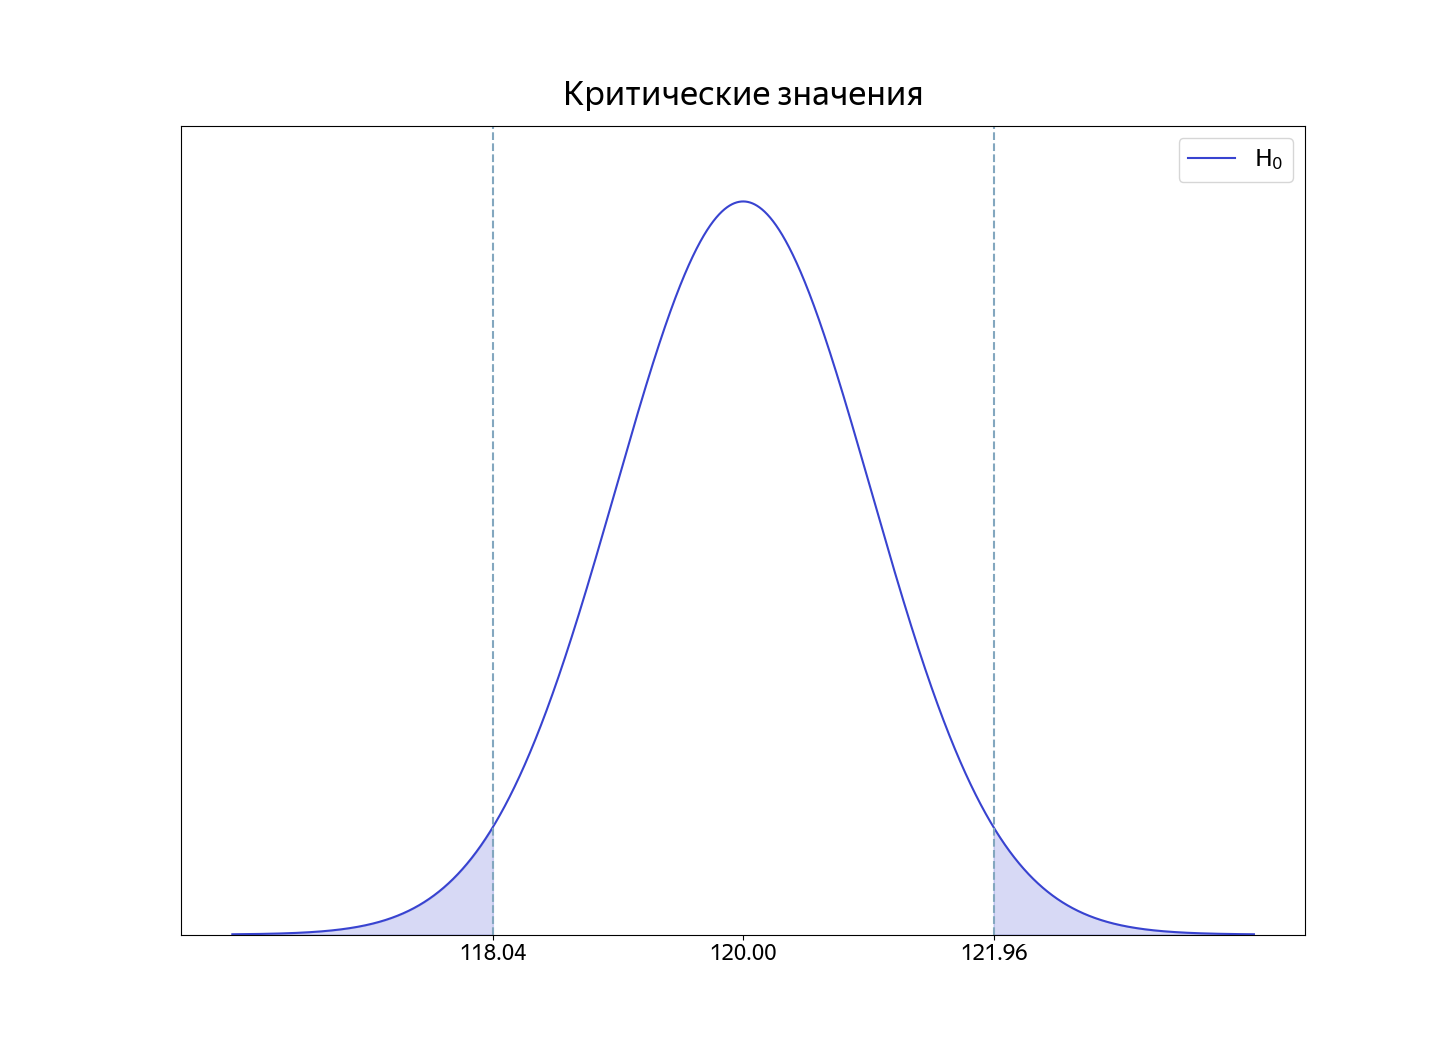

У нас получились области, которые соответствуют ошибке первого рода. Напомним определение:

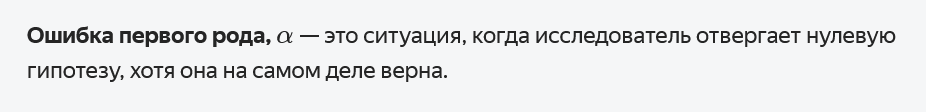

Если бы мы получили в результате измерений среднее число меньше 118.04 или больше 121.96, например, xˉ=117, то нам бы пришлось отвергнуть нулевую гипотезу. И если бы она на самом деле была верна, то мы бы совершили ошибку первого рода.
Пока ничего нового. А теперь давайте представим, что на самом деле нулевая гипотеза неверна, а верна альтернативная. И на секунду поверим, что мы знаем, что идея зоологов увеличивает популяцию на 3 единицы. На самом деле мы этого знать не можем, но нам поможет эта воображаемая картина. Тогда получается, что если бы мы многократно повторяли эксперимент, то получили бы распределение средних, центр которого был бы не 120, а 123.

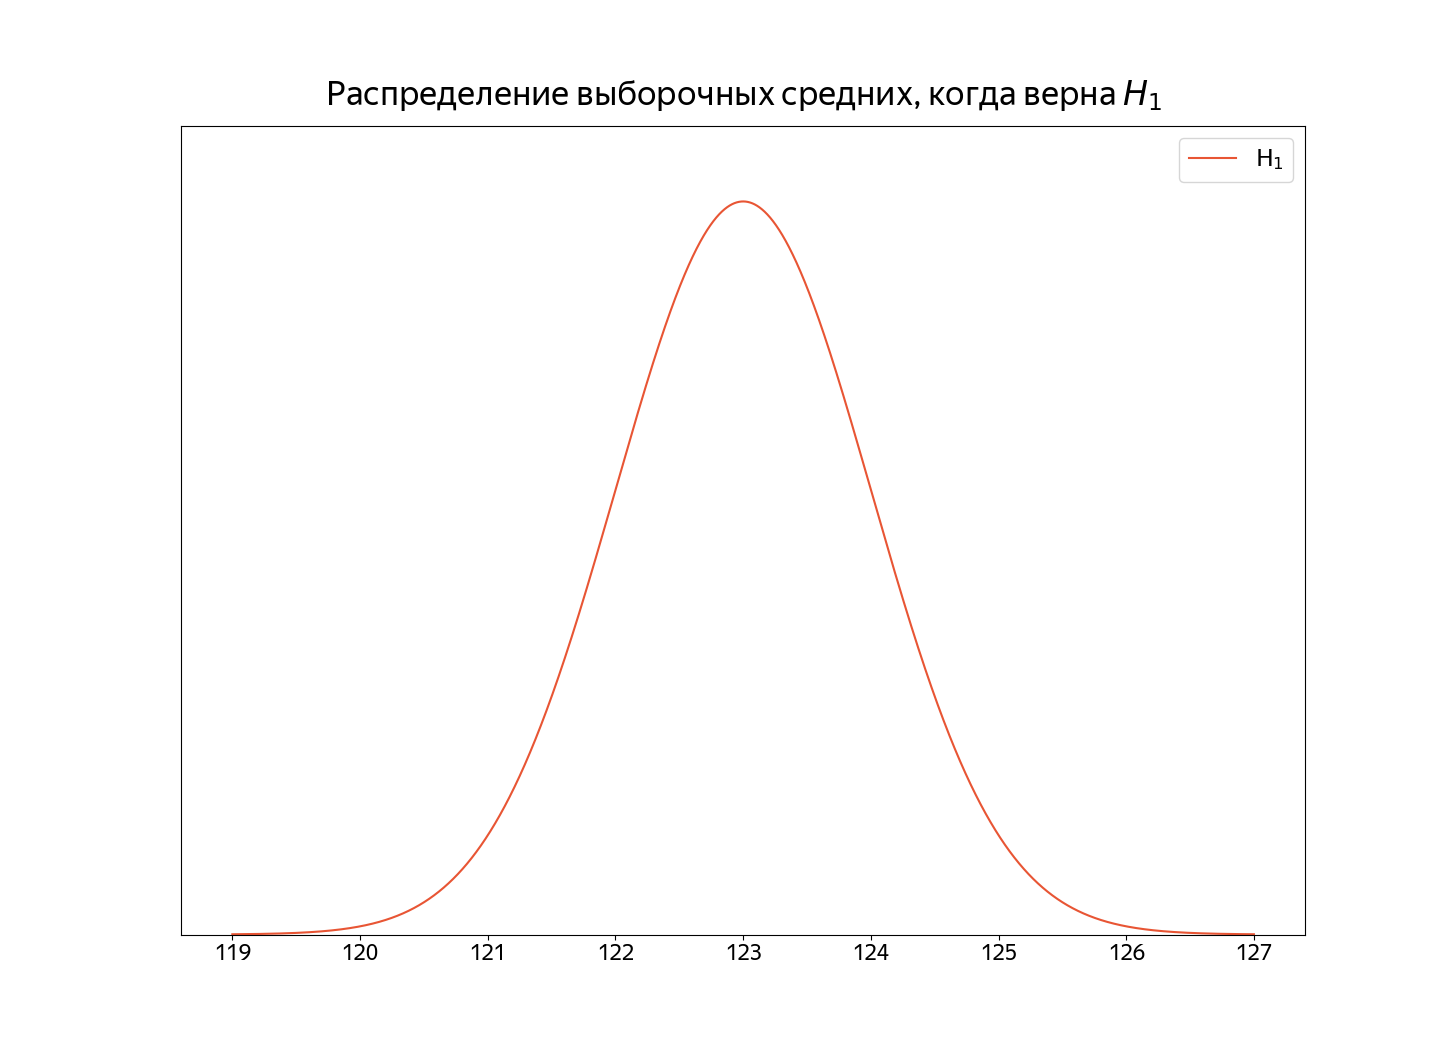

То есть в таком случае мы бы почти всегда получали значения, близкие к 123,123, и крайне редко значения около 120.120. Давайте теперь совместим два графика.

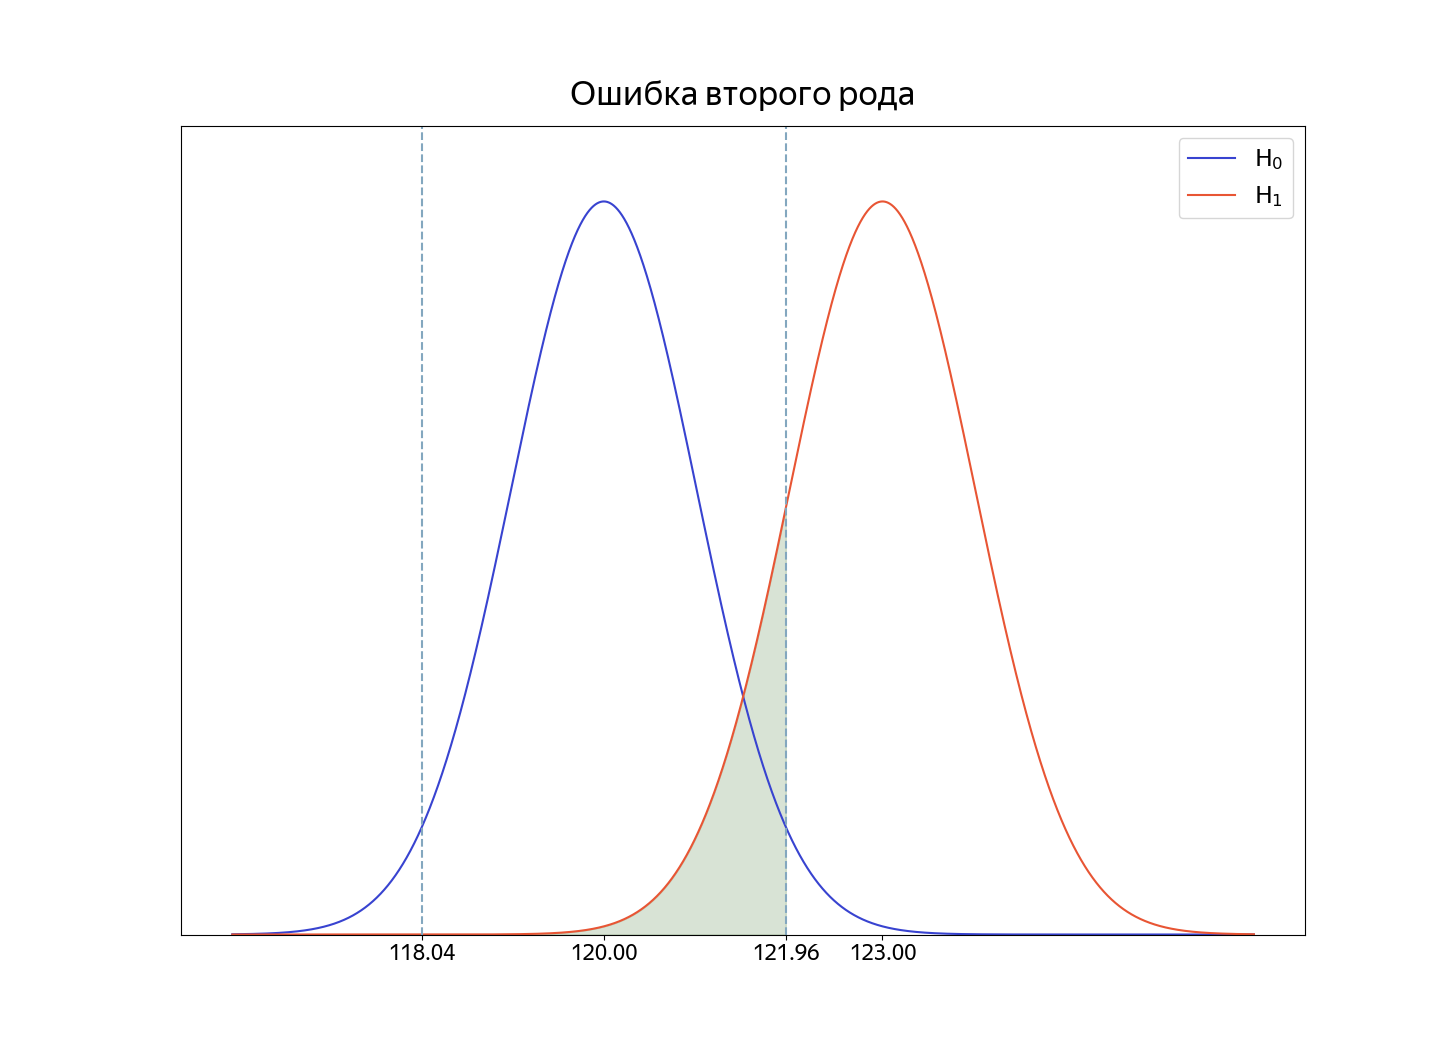

Когда мы объединили два графика, мы закрасили особую зону. Она отражает ситуации, когда на самом деле верна альтернативная гипотеза, но нам попалась такая выборка, что среднее значение оказалось ниже критического. Тогда мы бы не стали отвергать нулевую гипотезу. То есть на самом деле зоологи сделали всё правильно, их идея с искусственным выведением черепах в целом работает. Но вот статистика сыграла с ними злую шутку и они упустили важное открытие. 
Вероятность такой ошибки обозначают с помощью буквы β.

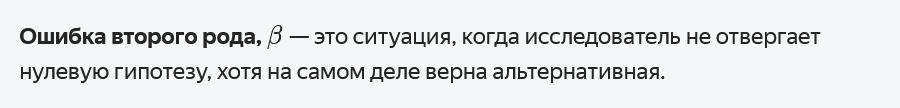

Но на практике обычно используют другой термин, который называется мощность и вычисляется он как 1−β. Если нулевая гипотеза неверна, то мы хотели бы её отклонять. И мощность показывает вероятность правильно отклонить нулевую гипотезу, когда она на самом деле должна быть отклонена. В контексте этого исследования мощность статистического теста — это вероятность того, что тест правильно покажет увеличение численности популяции морских черепах после введения мер по искусственному выведению и выпуску черепах, если такое увеличение действительно произошло.

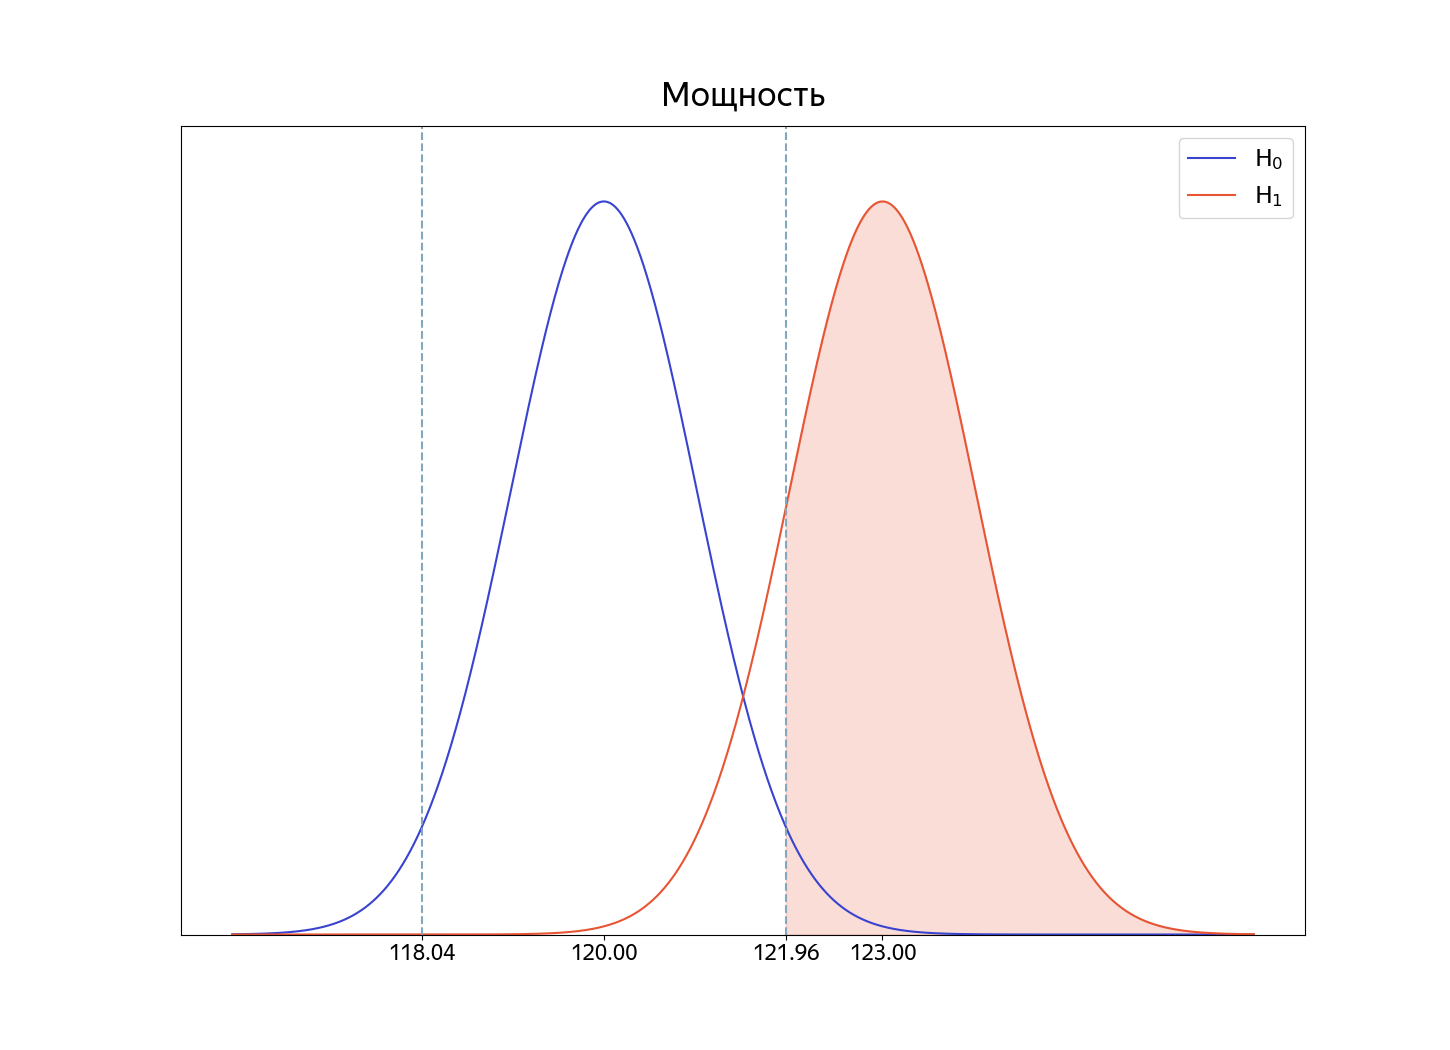

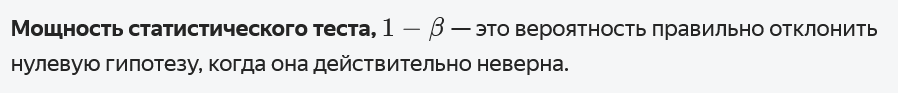

Иными словами, это вероятность обнаружить эффект (в нашем случае — увеличение числа морских черепах), если он действительно существует.
Мощность теста зависит от нескольких факторов, включая размер выборки и величину эффекта. Большие выборки и большие эффекты обычно ведут к большей мощности. Если у исследования низкая мощность, статистический тест может не обнаружить реальное увеличение численности популяции морских черепах.
Важно отметить, что мощность теста следует рассматривать ещё на этапе планирования исследования, так как она помогает определить необходимый размер выборки. В нашем примере, если зоологи видят, что их исследование имеет недостаточную мощность, они могут увеличить длительность исследования или использовать дополнительные методы сбора данных для увеличения размера выборки.